任务：基于transfer_data.csv文件，建立MLP 模型，并利用迁移学习预测未知数据。

1. 实现x对y的预测，可视化结果
2. 利用transfer_data2.csv文件，对前模型进行二次训练，对比模型训练次数少的情况下的表现

      x         y
0  0.06   11.1236
1 -2.16   11.3456
2  6.38   64.4644
3  9.42  118.5764
4  8.58  101.7764


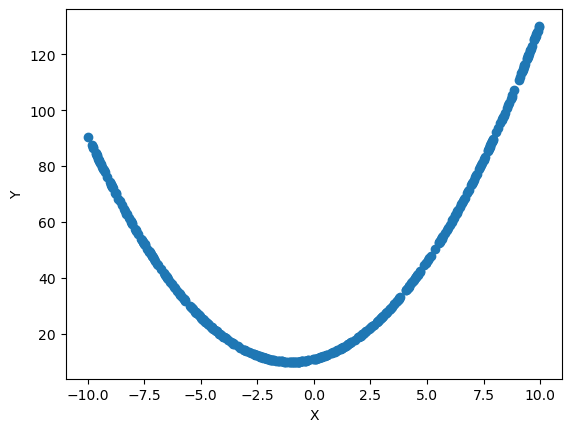

In [48]:
#load the data
import pandas as pd
import numpy as np

data = pd.read_csv('data/transfer_data.csv')
print(data.head())

X = data.loc[:,'x']
y = data.loc[:,'y']

#visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()



In [49]:
# set up model
X = np.array(X).reshape(-1, 1)
print(X.shape, y.shape)

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Input

model = Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()



(400, 1) (400,)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [50]:
# train the model
model.fit(X, y, epochs=100)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3320.2661
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3428.9563 
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3111.7329  
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3320.3931 
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3030.8760 
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2806.7168 
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2792.7759 
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2689.8252 
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2515.0459 
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2589.7964 
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2685.7085 
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2629.8882 
Epoch 13/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2359.6431 
Epoch 14/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2219.4172 
Epoch 15/100
13

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


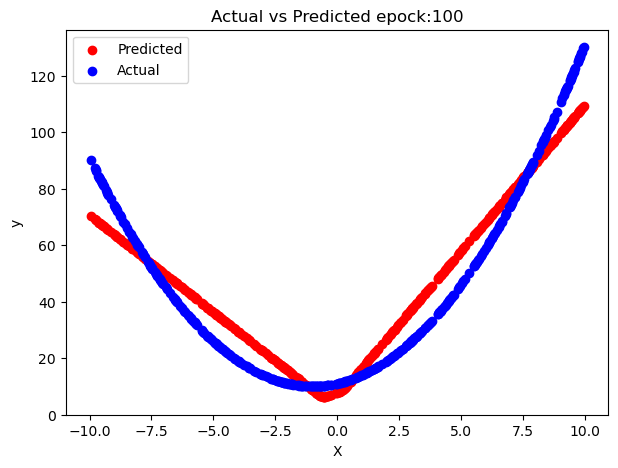

In [51]:
def show_prediction(model, X, y,epock):
    y_pred = model.predict(X)

    fig2 = plt.figure(figsize=(7, 5))
    plt.scatter(X,y_pred,color='red',label='Predicted')
    plt.scatter(X,y,color='blue',label='Actual')
    plt.title('Actual vs Predicted epock:'+str(epock))
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

show_prediction(model, X, y,100)


Epoch 1/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 79.2381 
Epoch 2/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 81.9012 
Epoch 3/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 84.2450 
Epoch 4/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 80.2611 
Epoch 5/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 79.8412 
Epoch 6/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 76.6563 
Epoch 7/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 85.6901  
Epoch 8/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 74.1404 
Epoch 9/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 83.5107 
Epoch 10/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 76.8004 
Epoch 11/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 80.9212 
Epoch 12/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 78.4782 
Epoch 13/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 75.9431 
Epoch 14/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 80.3654 
Epoch 15/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s

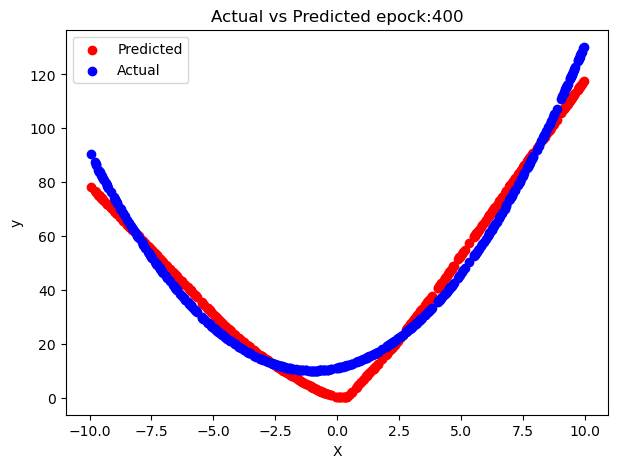

In [52]:
model.fit(X, y, epochs=300)
show_prediction(model, X, y,400)

In [53]:
#save and load model
import joblib

# save model
joblib.dump(model, 'model.pkl')

# load model
model2 = joblib.load('model.pkl')

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


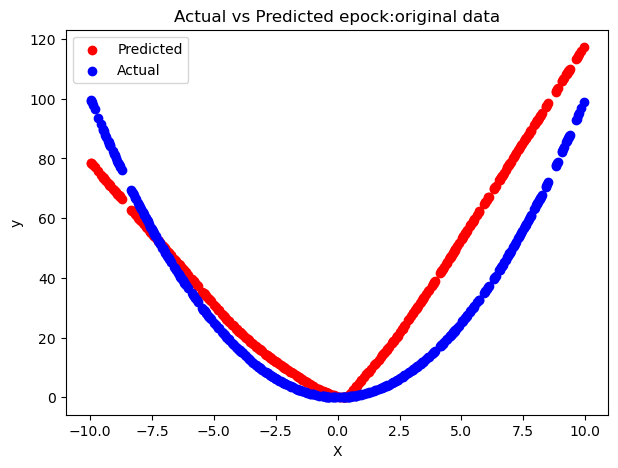

In [54]:
data2 = pd.read_csv('data/transfer_data2.csv')

X2 = data2.loc[:,'x']
y2 = data2.loc[:,'y']
X2 = np.array(X2).reshape(-1, 1)
# predict and visualize use model2
show_prediction(model2, X2, y2, 'original data')

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 261.9533  
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 139.1561 
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 76.0242  
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 51.0345 
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44.1495 
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 48.5328 
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44.3612 
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43.5889 
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 40.3252 
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 41.4991 
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38.5849 
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 40.6144 
Epoch 13/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39.9440 
Epoch 14/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35.5320 
Epoch 15/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - 

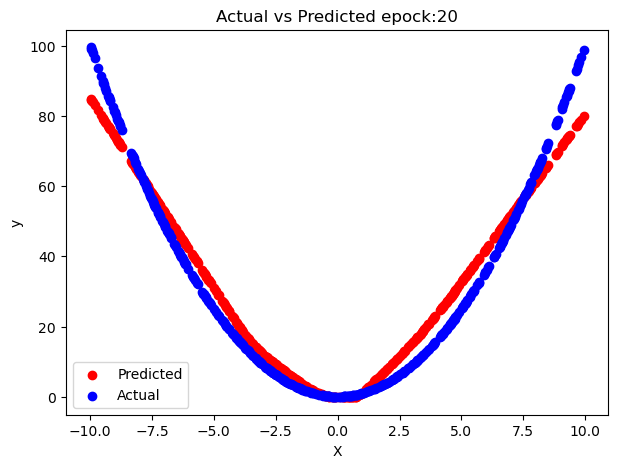

In [55]:
model2.fit(X2,y2,epochs = 20)
show_prediction(model2, X2, y2, '20')

Epoch 1/80
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35.7420 
Epoch 2/80
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30.7904 
Epoch 3/80
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35.1328 
Epoch 4/80
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 34.0153 
Epoch 5/80
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29.5616 
Epoch 6/80
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29.3476 
Epoch 7/80
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31.2120 
Epoch 8/80
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27.7206 
Epoch 9/80
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30.0739 
Epoch 10/80
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31.7038 
Epoch 11/80
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28.0683 
Epoch 12/80
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28.4398 
Epoch 13/80
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28.6455 
Epoch 14/80
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26.4969 
Epoch 15/80
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss

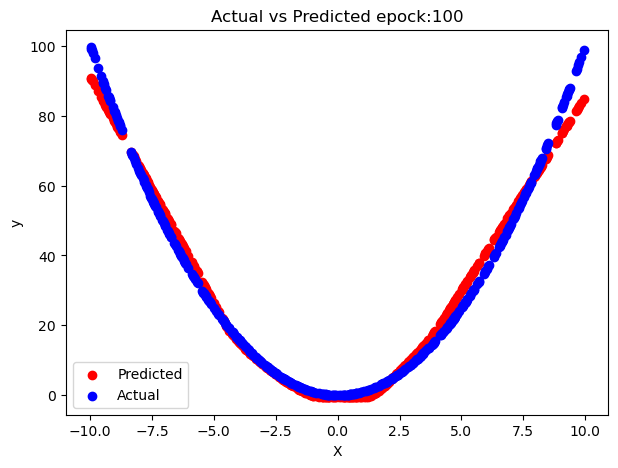

In [56]:
model2.fit(X2,y2,epochs = 80)
show_prediction(model2, X2, y2, '100')